In [12]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('dup_class.csv')
data

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183,0
715,716,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194,2
716,717,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204,3
717,718,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197,2


In [14]:
data.shape

(719, 20)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   


Observation
1.  Total 719 data points and 20 attributes.
2.  All the datatypes of features are same.



In [16]:
col=data.columns
for i in col:
  print(i,':',data[i].unique())
  print('_________________________________________')

ID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 2



*   By checking unique values of all features we can conclude that there are no missing or null values in the data.




#Pearson's Correlation

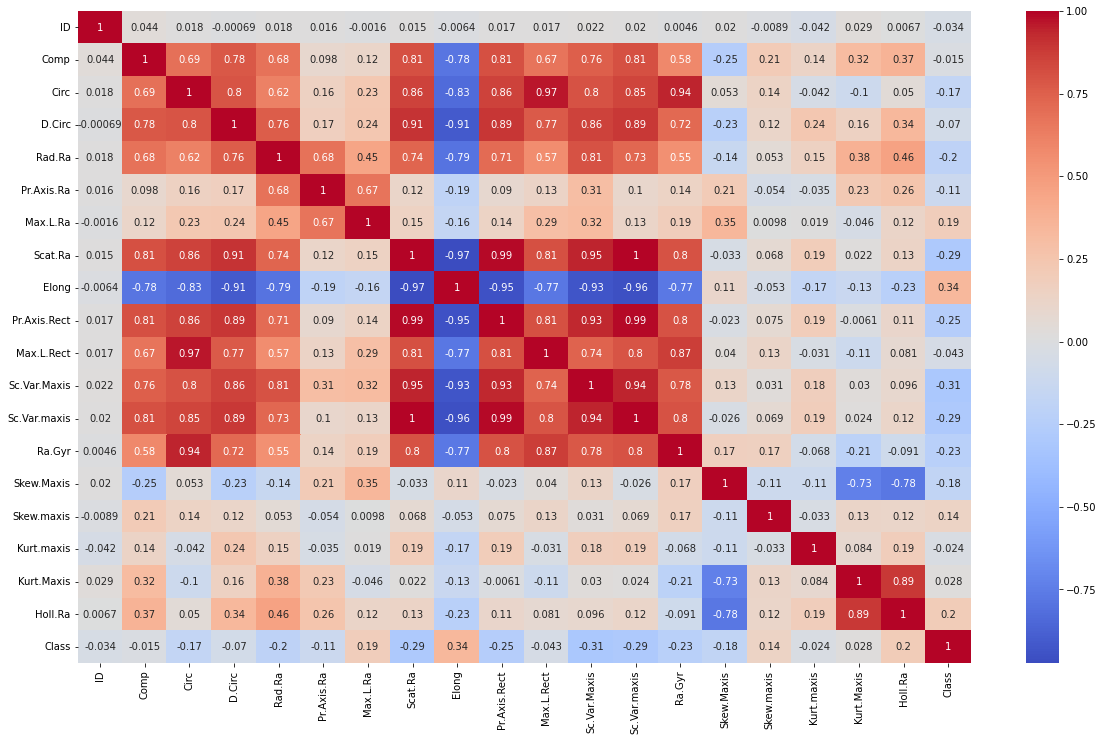

In [17]:
#By using pearson's correlation method find out the correlation between the features

plt.figure(figsize=(20,12))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

From the above correlation matrix we observe that

*   The features Kurt.Maxis and Holl.Ra are highly correlated to each other
*   Scat.Ra,Pr.Axis.Rect,Sc.Var.maxis,Sc.Var.Maxis are also highly correlated to each other.

When two features have high correlation to each other we can use any one of the feature by dropping the other.
From above we use Kurt.Maxis and Sc.Var.maxis 



In [18]:
#We can check the correlated features by providing certain threshold value



def pear_corr(dataset,value):
  corr=set()
  cor_matrix= dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if (cor_matrix.iloc[i,j])>value:
        col=cor_matrix.columns[i]
        corr.add(col)
  return corr

In [19]:
#These are the features of having correlation above Threshold value.
features=pear_corr(data,0.85)
features

{'Holl.Ra',
 'Max.L.Rect',
 'Pr.Axis.Rect',
 'Ra.Gyr',
 'Sc.Var.Maxis',
 'Sc.Var.maxis',
 'Scat.Ra'}

In [20]:
drop_col=['Scat.Ra','Pr.Axis.Rect','Sc.Var.Maxis','Holl.Ra','ID']

#Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [22]:
X=data.drop(columns=['Class'],axis=1)
y=data['Class']

rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=1)
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

In [23]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [24]:
#ranks of the features obtained by RFE method 
#Lower the rank higher will be the importance in modeling.

l2=rfe.ranking_
l2

array([17,  9, 13,  7, 12, 10,  2, 18,  5, 19,  3, 15,  1,  6, 11,  8, 14,
        4, 16])

Plotting feature importance rankings using Recursive Feature Elimination

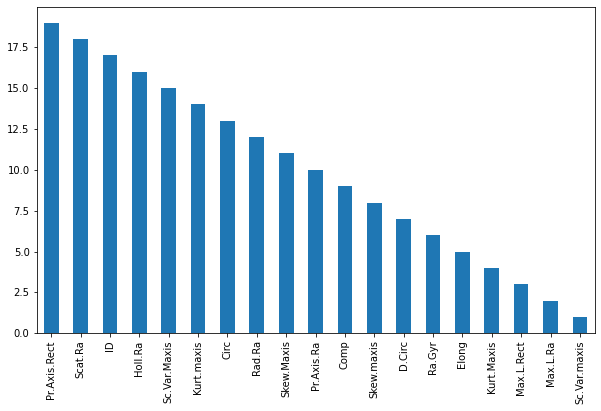

In [25]:
#Barplot to visualize important features 
cols=X.columns
plt.figure(figsize=(10,6))
vals=pd.Series(l2,index=cols)
vals.sort_values(ascending=False,inplace=True)
vals.plot.bar()

From RFE method and from pearsons correlation method we drop the columns Scat.Ra,  Pr.Axis.Rect,  Sc.Var.Maxis,  Holl.Ra and  ID.

In [26]:
drop_col=['Scat.Ra','Pr.Axis.Rect','Sc.Var.Maxis','Holl.Ra','ID']

In [27]:
#Dropping the features from the data
data=data.drop(drop_col,axis=1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Comp          719 non-null    int64
 1   Circ          719 non-null    int64
 2   D.Circ        719 non-null    int64
 3   Rad.Ra        719 non-null    int64
 4   Pr.Axis.Ra    719 non-null    int64
 5   Max.L.Ra      719 non-null    int64
 6   Elong         719 non-null    int64
 7   Max.L.Rect    719 non-null    int64
 8   Sc.Var.maxis  719 non-null    int64
 9   Ra.Gyr        719 non-null    int64
 10  Skew.Maxis    719 non-null    int64
 11  Skew.maxis    719 non-null    int64
 12  Kurt.maxis    719 non-null    int64
 13  Kurt.Maxis    719 non-null    int64
 14  Class         719 non-null    int64
dtypes: int64(15)
memory usage: 84.4 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Comp,719.0,93.435327,8.111406,73.0,87.0,93.0,99.0,119.0
Circ,719.0,44.851182,6.150286,33.0,40.0,44.0,49.0,59.0
D.Circ,719.0,81.723227,15.528208,40.0,70.0,79.0,96.0,110.0
Rad.Ra,719.0,168.579972,33.809172,105.0,141.0,166.0,194.5,333.0
Pr.Axis.Ra,719.0,61.847010,8.259136,47.0,57.0,61.0,65.0,138.0
Max.L.Ra,719.0,8.625869,4.916908,2.0,6.0,8.0,10.0,55.0
Elong,719.0,41.075104,7.764459,26.0,33.0,43.0,46.0,61.0
Max.L.Rect,719.0,148.030598,14.560092,118.0,137.0,146.0,159.0,188.0
Sc.Var.maxis,719.0,436.215577,174.964977,184.0,317.0,362.0,584.5,1018.0
Ra.Gyr,719.0,174.726008,32.149568,109.0,149.0,174.0,198.0,262.0


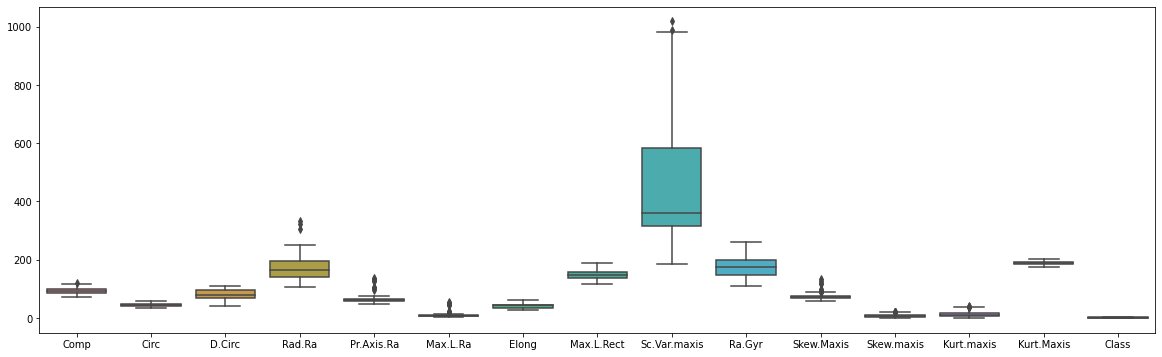

In [30]:
#Plotting boxplot of the data
plt.figure(figsize=(20,6))
sns.boxplot(data=data)

Handling Ouliers using IQR method

In [31]:
#From above plot there are outliers in the columns Rad.Ra, Pr.Axis.Ra, Max.L.Ra, Sc.Var.maxis
cols2=['Rad.Ra','Pr.Axis.Ra','Sc.Var.maxis','Max.L.Ra']
upper=[]
lower=[]
for col in cols2:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)
  upper.append(upper_limit)
  lower.append(lower_limit)
lower

[60.75, 45.0, -84.25, 0.0]

In [32]:
#Creating new dataframe by removing outliers.
new=data.loc[(data['Rad.Ra']< upper[0]) & (data['Rad.Ra']> lower[0])]
new.shape

(716, 15)

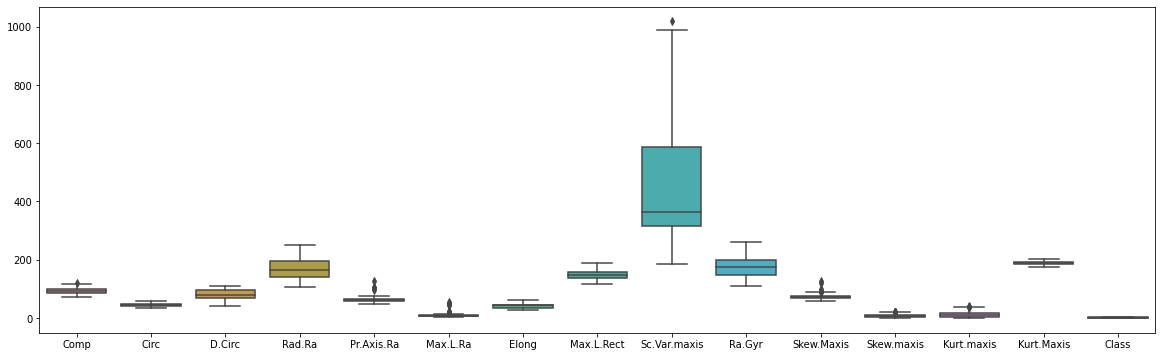

In [33]:
plt.figure(figsize=(20,6))
sns.boxplot(data=new)

In [34]:
new=new.loc[(new['Pr.Axis.Ra']< upper[1]) & (new['Rad.Ra']> lower[1])]
new.shape

(711, 15)

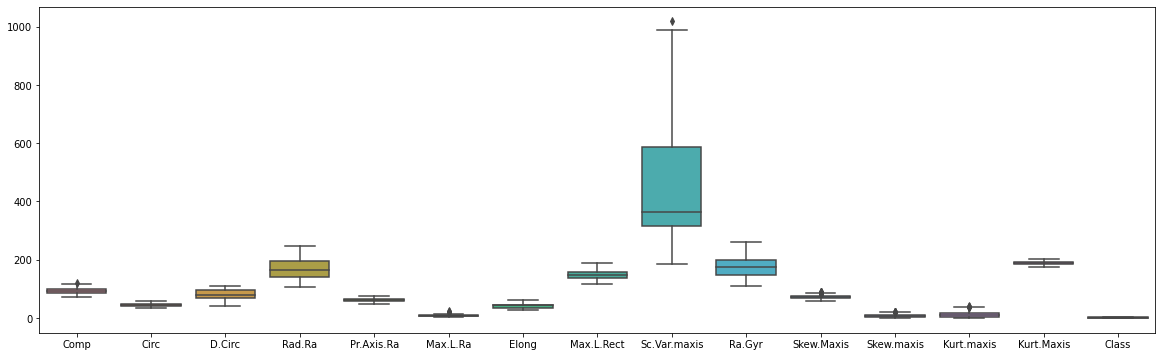

In [35]:
plt.figure(figsize=(20,6))
sns.boxplot(data=new)


In [36]:
new=new.loc[(new['Sc.Var.maxis']<= upper[2]) & (new['Sc.Var.maxis']>= lower[2])]
new.shape

(709, 15)

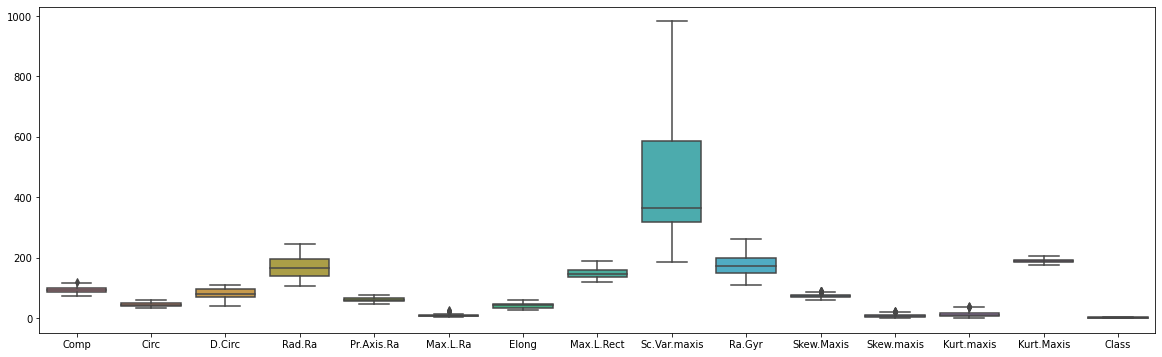

In [37]:
plt.figure(figsize=(20,6))
sns.boxplot(data=new)

In [38]:
new=new.loc[(new['Max.L.Ra']< upper[3]) & (new['Max.L.Ra']> lower[3])]
new.shape

(705, 15)

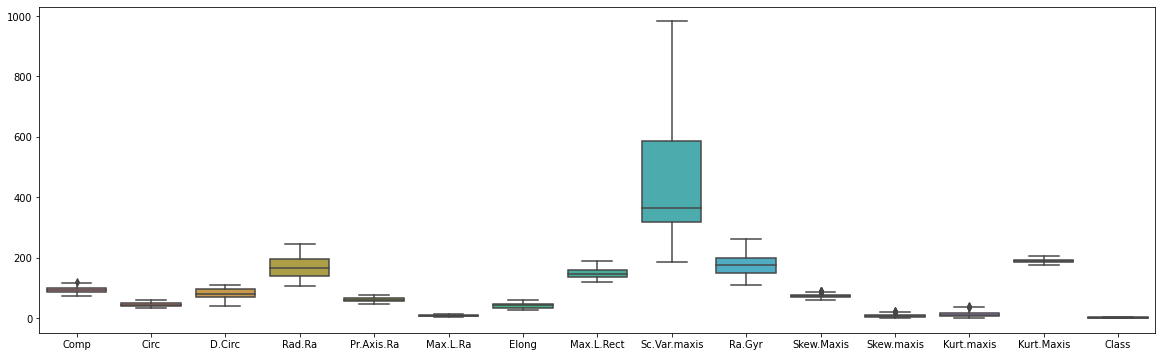

In [39]:
plt.figure(figsize=(20,6))
sns.boxplot(data=new)

Now the outliers are handled

In [40]:
new.reset_index(drop=True,inplace=True)
X=new.drop(columns=['Class'],axis=1)
y=new['Class']

#Spliting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#Feature Scaling

In [42]:
#By using Standardscaler features are scaled so that we can train our model better.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [43]:
#import required libraries for training the model

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#importing metrics to find accuracy
from sklearn.metrics import f1_score,plot_confusion_matrix

In [44]:
#Creating objects of the model
log=LogisticRegression()
sgd=SGDClassifier()
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

#Training the data using above models

In [45]:
log.fit(X_train,y_train)
sgd.fit(X_train,y_train)
svc.fit(X_train,y_train)
knn.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [46]:
yp1=log.predict(X_test)
yp2=sgd.predict(X_test)
yp3=svc.predict(X_test)
yp4=knn.predict(X_test)
yp5=dtc.predict(X_test)
yp6=rfc.predict(X_test)
yp7=gbc.predict(X_test)

In [47]:
#Calculating train-score of all models i.e:Accuracy
str1=log.score(X_train,y_train)
str2=sgd.score(X_train,y_train)
str3=svc.score(X_train,y_train)
str4=knn.score(X_train,y_train)
str5=dtc.score(X_train,y_train)
str6=rfc.score(X_train,y_train)
str7=gbc.score(X_train,y_train)
trainscore=[str1,str2,str3,str4,str5,str6,str7]
trainscore

[0.7819148936170213,
 0.7659574468085106,
 0.8599290780141844,
 0.8209219858156028,
 1.0,
 1.0,
 0.9946808510638298]

In [48]:
#Calculating test-score of all models i.e:Accuracy
st1=log.score(X_test,y_test)
st2=sgd.score(X_test,y_test)
st3=svc.score(X_test,y_test)
st4=knn.score(X_test,y_test)
st5=dtc.score(X_test,y_test)
st6=rfc.score(X_test,y_test)
st7=gbc.score(X_test,y_test)
testscore=[st1,st2,st3,st4,st5,st6,st7]
testscore

[0.8226950354609929,
 0.75177304964539,
 0.7588652482269503,
 0.7163120567375887,
 0.7021276595744681,
 0.7943262411347518,
 0.7801418439716312]

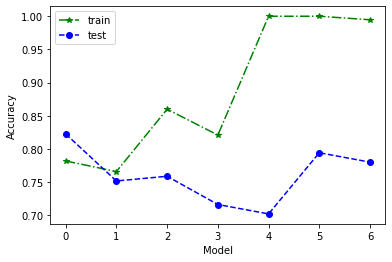

In [49]:
#By plotting the train and test scores find out the model which got better accuracy
import matplotlib.pyplot as plt
plt.plot(trainscore,'*g',linestyle='dashdot',label='train')
plt.plot(testscore,'ob',linestyle='dashed',label='test')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()

From the above plot Logistic Regression got the better accuracy among them.
Tune the parameters of the Logistic regression to gain better accuracy for the model.

Tuning parameters using Grid search CV to get better scores

In [ ]:
#from sklearn.model_selection import GridSearchCV
#parameters={'penalty':['none'],'solver':['newton-cg','lbfgs','sag','saga'],
 #           'C':[0.1,0.2,0.5,0.7,0.9,1.0],'l1_ratio':[0.1,0.2,0.5,0.8,0.9]}
#gscv=GridSearchCV(LogisticRegression(),param_grid=parameters)
#gscv.fit(X_train,y_train)

In [ ]:
gscv.best_params_

{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'none', 'solver': 'saga'}

In [ ]:
model1=LogisticRegression(C=1.0,l1_ratio=0.8,solver='saga',penalty='none')
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))


0.7925531914893617
0.851063829787234


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


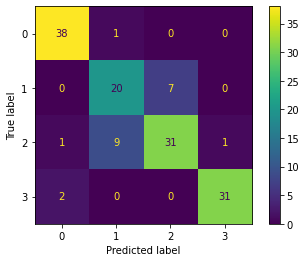

In [ ]:
plot_confusion_matrix(model1,X_test,y_test)

Tuning parameters to get better results

**Building a Final-Model**

In [ ]:
#By the above tuning we got the parameters and fit them in the final_model

final_model=LogisticRegression(C=1.0,l1_ratio=0.8,solver='saga',penalty='none')
final_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(l1_ratio=0.8, penalty='none', solver='saga')

**Calculating accuracy of the test data**

In [ ]:
accuracy=final_model.score(X_test,y_test)
accuracy

0.851063829787234

**Calculating f1_score of the test data**

In [ ]:
y_pred_final=final_model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision=precision_score(y_test, y_pred_final,pos_label='positive',average='micro')
recall=recall_score(y_test, y_pred_final,pos_label='positive',average='micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
f1_score=(2*precision*recall)/(precision+recall)
f1_score

0.8510638297872339

**Plotting Confusion matrix for the test data**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


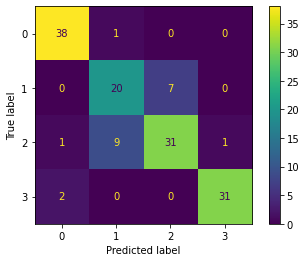

In [ ]:
plot_confusion_matrix(final_model,X_test,y_test)

In [ ]:
X.head(3)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Max.L.Rect,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis
0,88,39,70,166,66,7,44,134,332,143,69,5,13,193
1,85,35,64,129,57,6,57,125,200,123,65,1,23,196
2,91,41,84,141,57,9,45,143,330,158,72,9,14,189


In [ ]:
y.head(3)

0    0
1    3
2    3
Name: Class, dtype: int64

**Predicting class of car for new instance**

In [ ]:
l1=[[85,35,64,129,57,6,57,125,200,123,65,1,23,196]]

new=pd.DataFrame(l1,columns=['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Elong', 'Max.L.Rect', 'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis','Kurt.Maxis'])
new

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Max.L.Rect,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis
0,85,35,64,129,57,6,57,125,200,123,65,1,23,196


In [ ]:
y_pred=model1.predict(new)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([3])

The predicted value for class of car comes out to be class-3.